In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from sklearn.datasets import make_moons

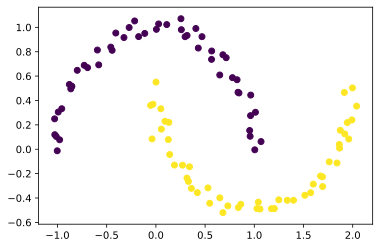

In [2]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1]);

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![](data/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan=DBSCAN()

dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

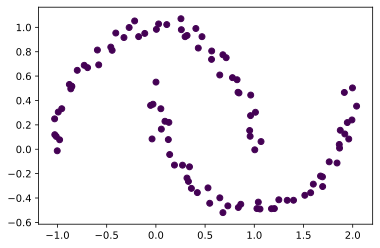

In [5]:
dbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

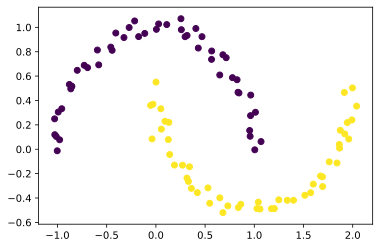

In [9]:
dbscan=DBSCAN(eps=0.25)
dbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [10]:
from hdbscan import HDBSCAN

In [11]:
hdbscan=HDBSCAN(gen_min_span_tree=True)

hdbscan

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

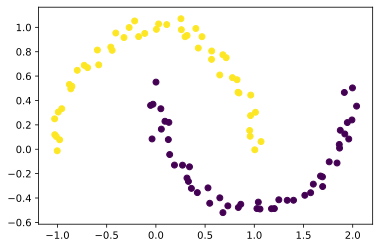

In [12]:
hdbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.labels_);

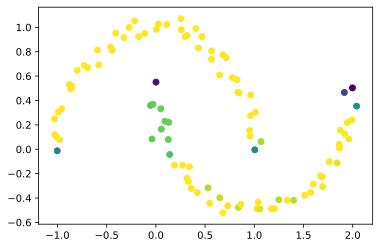

In [13]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.probabilities_);

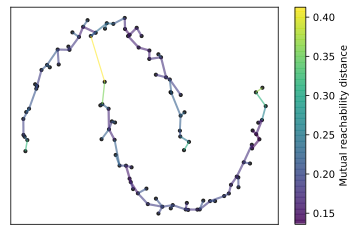

In [15]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6,
                                    node_size=10,
                                    edge_linewidth=1.2);

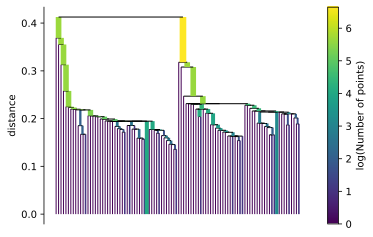

In [17]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

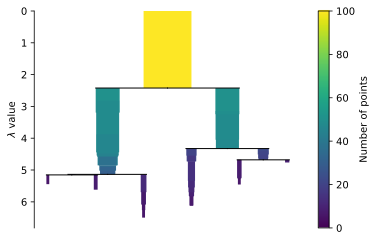

In [18]:
hdbscan.condensed_tree_.plot();

In [19]:
import seaborn as sns

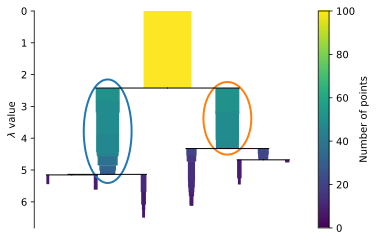

In [21]:
hdbscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![](data/optics.png)

In [22]:
from sklearn.cluster import OPTICS

In [23]:
opt=OPTICS(max_eps=1)

opt

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30, max_eps=1,
       metric='minkowski', metric_params=None, min_cluster_size=None,
       min_samples=5, n_jobs=None, p=2, predecessor_correction=True, xi=0.05)

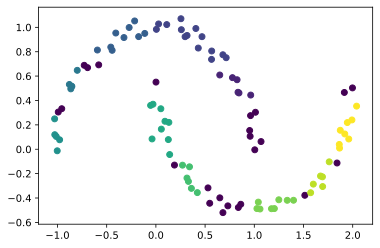

In [24]:
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

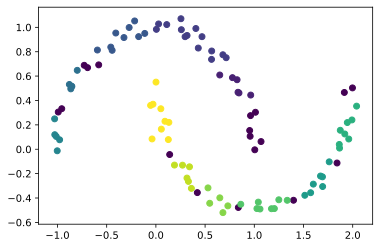

In [26]:
opt=OPTICS(eps=0.2, max_eps=0.25)
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![](data/gmm.png)


![](data/gmm2.png)

In [28]:
from sklearn.mixture import GaussianMixture as GM

In [29]:
gm=GM(n_components=2, covariance_type='full')

gm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [30]:
gm.fit(moons[0])

gm.means_

array([[ 1.16071016, -0.13395824],
       [-0.13073271,  0.61499379]])

In [31]:
gm.covariances_

array([[[0.34920953, 0.06164232],
        [0.06164232, 0.09111015]],

       [[0.35299943, 0.05985701],
        [0.05985701, 0.10201055]]])

In [32]:
gm.predict_proba(moons[0])[:5]

array([[6.13342651e-02, 9.38665735e-01],
       [9.99985319e-01, 1.46805743e-05],
       [1.11944713e-05, 9.99988806e-01],
       [9.99747450e-01, 2.52550404e-04],
       [1.04480770e-01, 8.95519230e-01]])

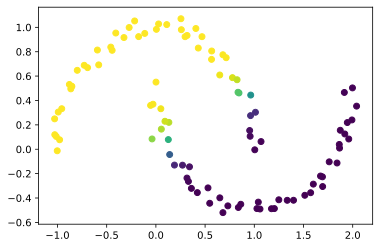

In [33]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict_proba(moons[0])[:,1]);

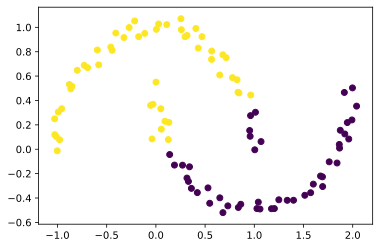

In [34]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict(moons[0]));

In [40]:
from sklearn.datasets import make_classification as mc

In [45]:
X=mc(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

In [46]:
gm=GM(n_components=2, covariance_type='full')
gm.fit(X[0]);

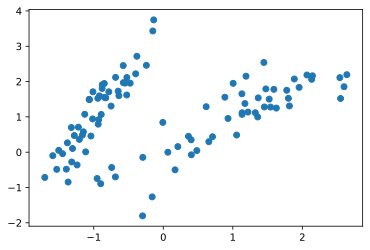

In [49]:
plt.scatter(X[0][:,0], X[0][:,1]);

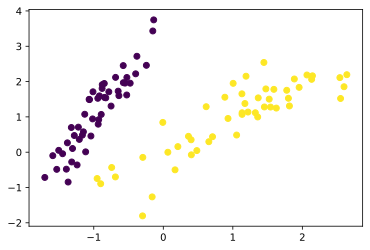

In [47]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

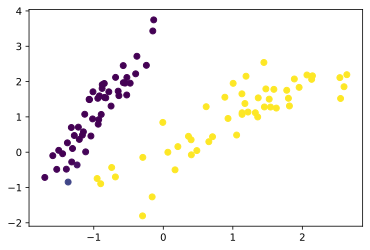

In [48]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:,1]);

![](data/usl_models.png)

# Lección Guiada

In [94]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import pandas as pd
import seaborn as sns
import numpy as np

In [95]:
breadbasket=pd.read_csv('data/breadbasket_dms.csv')
breadbasket.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [96]:
breadbasket.describe()

Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000

In [97]:
breadbasket['Datetime']=pd.to_datetime(breadbasket.Date+' '+breadbasket.Time,
                                       format='%Y-%m-%d %H:%M:%S')
breadbasket.head()

Date      Time  Transaction           Item            Datetime
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57

In [98]:
breadbasket.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [99]:
breadbasket.Item.nunique()

95

In [100]:
breadbasket.Item.value_counts().nlargest(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [101]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

food=beverage+other+kids+snacks+bread+breakfast_pastry+dessert+condiments+breakfast+lunch

other_food=[e for e in breadbasket.Item.unique() if e not in food]

food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']

for i in range(len(food_names)):
    breadbasket[food_names[i]]=np.where(breadbasket.Item.isin(food_list[i]), 1, 0)
    
breadbasket.head()

Date      Time  Transaction           Item            Datetime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  
0           0          0      0  
1           0          0      0  
2           0          0      0  
3           0          0      0  
4           1          0      0

In [102]:
bread_group=breadbasket.groupby(['Datetime', 'Transaction']).sum()

bread_group.head()

beverage  other  kids  snacks  bread  \
Datetime            Transaction                                         
2016-10-30 09:58:11 1                   0      0     0       0      1   
2016-10-30 10:05:34 2                   0      0     0       0      2   
2016-10-30 10:07:57 3                   1      0     0       0      0   
2016-10-30 10:08:41 4                   0      0     0       0      0   
2016-10-30 10:13:03 5                   1      0     0       0      1   

                                 breakfast_pastry  dessert  condiments  \
Datetime            Transaction                                          
2016-10-30 09:58:11 1                           0        0           0   
2016-10-30 10:05:34 2                           0        0           0   
2016-10-30 10:07:57 3                           0        1           1   
2016-10-30 10:08:41 4                           1        0           0   
2016-10-30 10:13:03 5                           1        0           0   

                                 breakfast  lunch  
Datetime            Transaction                    
2016-10-30 09:58:11 1                    0      0  
2016-10-30 10:05:34 2                    0      0  
2016-10-30 10:07:57 3                    0      0  
2016-10-30 10:08:41 4                    0      0  
2016-10-30 10:13:03 5                    0      0

In [103]:
bread_group.shape

(9531, 10)

In [104]:
bread_group.reset_index(level='Datetime', inplace=True)
bread_group.head()

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  
Transaction                                                           
1                           0        0           0          0      0  
2                           0        0           0          0      0  
3                           0        1           1          0      0  
4                           1        0           0          0      0  
5                           1        0           0          0      0

In [105]:
bread_group['day']=bread_group.Datetime.dt.day_name()
bread_group['hour']=bread_group.Datetime.dt.hour
bread_group['month']=bread_group.Datetime.dt.month

bread_group.head()

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch     day  \
Transaction                                                                    
1                           0        0           0          0      0  Sunday   
2                           0        0           0          0      0  Sunday   
3                           0        1           1          0      0  Sunday   
4                           1        0           0          0      0  Sunday   
5                           1        0           0          0      0  Sunday   

             hour  month  
Transaction               
1               9     10  
2              10     10  
3              10     10  
4              10     10  
5              10     10

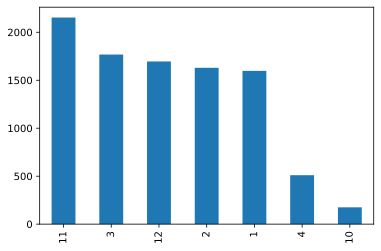

In [106]:
bread_group.month.value_counts().plot(kind='bar');

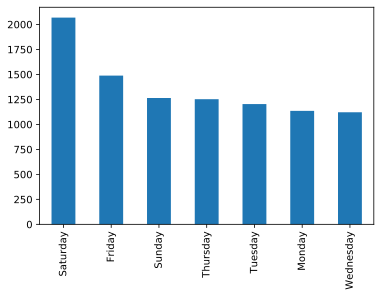

In [62]:
bread_group.day.value_counts().plot(kind='bar');

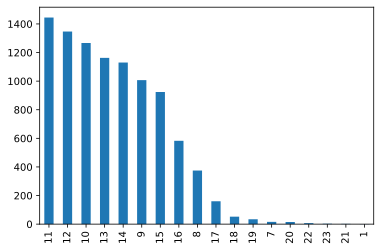

In [63]:
bread_group.hour.value_counts().plot.bar();

In [64]:
bread_dummy=pd.get_dummies(data=bread_group, columns=['day']).drop('Datetime', axis=1)
bread_dummy.head()

beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
Transaction                                                                    
1                   0      0     0       0      1                 0        0   
2                   0      0     0       0      2                 0        0   
3                   1      0     0       0      0                 0        1   
4                   0      0     0       0      0                 1        0   
5                   1      0     0       0      1                 1        0   

             condiments  breakfast  lunch  hour  day_Friday  day_Monday  \
Transaction                                                               
1                     0          0      0     9           0           0   
2                     0          0      0    10           0           0   
3                     1          0      0    10           0           0   
4                     0          0      0    10           0           0   
5                     0          0      0    10           0           0   

             day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
Transaction                                                        
1                       0           1             0            0   
2                       0           1             0            0   
3                       0           1             0            0   
4                       0           1             0            0   
5                       0           1             0            0   

             day_Wednesday  
Transaction                 
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

# PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca=PCA(n_components=4).fit_transform(bread_dummy)

pc_df=pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(4)])

pc_df.head()

pc_1      pc_2      pc_3      pc_4
0  3.197022 -0.925271  0.243811  0.005066
1  2.227490 -1.272567  1.182276 -0.163727
2  2.107261  0.426310 -0.220287  0.880665
3  2.198567 -0.579301 -0.795211 -0.027811
4  2.206414  0.039266  0.431598 -0.335134

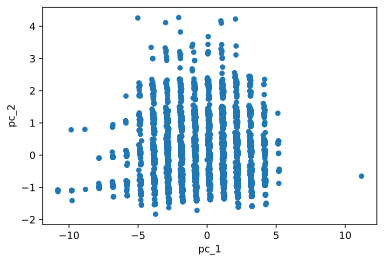

In [67]:
pc_df.plot.scatter(x='pc_1', y='pc_2');

# t-SNE

**t-Distributed Stochastic Neighbor Embbeding**

Convierte similitudes entre los datos en probabilidad conjunta y trata de minimizar la divergencia _Kullback-Leibler_ (entropía relativa):

$$D_{KL}(P|Q)=\sum P(x)log(\frac{P(x)}{Q(x)})$$




https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

In [68]:
from sklearn.manifold import TSNE

In [71]:
tsne=TSNE(n_components=2, perplexity=15)
emb=tsne.fit_transform(bread_dummy)

embedding=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

embedding.head()

emb_1      emb_2
0 -52.949345  28.217865
1 -37.726185  33.834541
2 -52.821262  11.789973
3 -36.740257  24.867752
4 -44.709423  20.379492

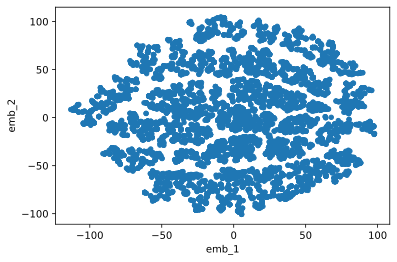

In [74]:
embedding.plot.scatter(x='emb_1', y='emb_2');

# UMAP

**Uniform Manifold Aproximation and Projection**

https://umap-learn.readthedocs.io/en/latest/

Tiene dos pasos:

+ KNN con pesos, según topología (grafo)
+ Se reduce la dimensión basándose en esa topología

In [73]:
import warnings
warnings.simplefilter('ignore')

In [75]:
from umap import UMAP

umap=UMAP(n_components=2).fit_transform(bread_dummy)

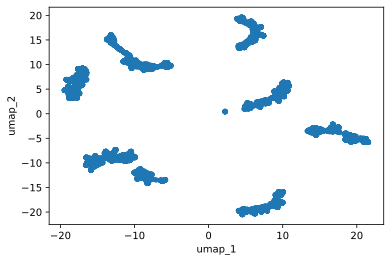

In [77]:
umap_df=pd.DataFrame(umap, columns=['umap_1', 'umap_2'])

umap_df.plot.scatter(x='umap_1', y='umap_2');

### Clustering

In [78]:
# K-Means

from sklearn.cluster import KMeans

In [79]:
kmeans=KMeans(n_clusters=3).fit(pc_df)

In [80]:
bread_group['label']=kmeans.predict(pc_df)
bread_group.head()

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch     day  \
Transaction                                                                    
1                           0        0           0          0      0  Sunday   
2                           0        0           0          0      0  Sunday   
3                           0        1           1          0      0  Sunday   
4                           1        0           0          0      0  Sunday   
5                           1        0           0          0      0  Sunday   

             hour  label  
Transaction               
1               9      1  
2              10      1  
3              10      1  
4              10      1  
5              10      1

In [81]:
# clusters transacciones por hora

cm=sns.light_palette('green', as_cmap=True)

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [82]:
# por dia

pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [84]:
bread_group[(bread_group.day=='Sunday')&(bread_group.label==0)]

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
27          2016-10-30 11:02:19         0      0     0       0      1   
28          2016-10-30 11:03:24         1      0     0       0      1   
29          2016-10-30 11:05:30         0      1     0       0      1   
30          2016-10-30 11:07:19         0      0     0       0      1   
31          2016-10-30 11:12:56         0      0     0       0      0   
...                         ...       ...    ...   ...     ...    ...   
9673        2017-04-09 12:32:03         1      0     0       0      1   
9674        2017-04-09 13:04:08         1      0     0       0      0   
9676        2017-04-09 13:06:34         1      0     0       0      0   
9677        2017-04-09 13:20:23         1      0     0       0      0   
9678        2017-04-09 13:49:21         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch     day  \
Transaction                                                                    
27                          0        0           0          0      0  Sunday   
28                          0        0           0          0      0  Sunday   
29                          0        0           1          0      0  Sunday   
30                          0        0           0          0      0  Sunday   
31                          0        0           0          0      0  Sunday   
...                       ...      ...         ...        ...    ...     ...   
9673                        0        0           0          0      0  Sunday   
9674                        0        0           0          0      0  Sunday   
9676                        0        0           0          0      1  Sunday   
9677                        0        0           0          0      0  Sunday   
9678                        0        0           0          0      0  Sunday   

             hour  label  
Transaction               
27             11      0  
28             11      0  
29             11      0  
30             11      0  
31             11      0  
...           ...    ...  
9673           12      0  
9674           13      0  
9676           13      0  
9677           13      0  
9678           13      0  

[645 rows x 14 columns]

In [85]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [86]:
dbscan=DBSCAN()

bread_group['label']=dbscan.fit_predict(umap_df)

bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [87]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [88]:
# HDBSCAN

from hdbscan import HDBSCAN

hdbscan=HDBSCAN(min_cluster_size=25)

bread_group['label']=hdbscan.fit_predict(umap_df)

bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [89]:
# GMM
gm=GM(n_components=4, covariance_type='full')


bread_group['label']=gm.fit_predict(pc_df)

bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [90]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

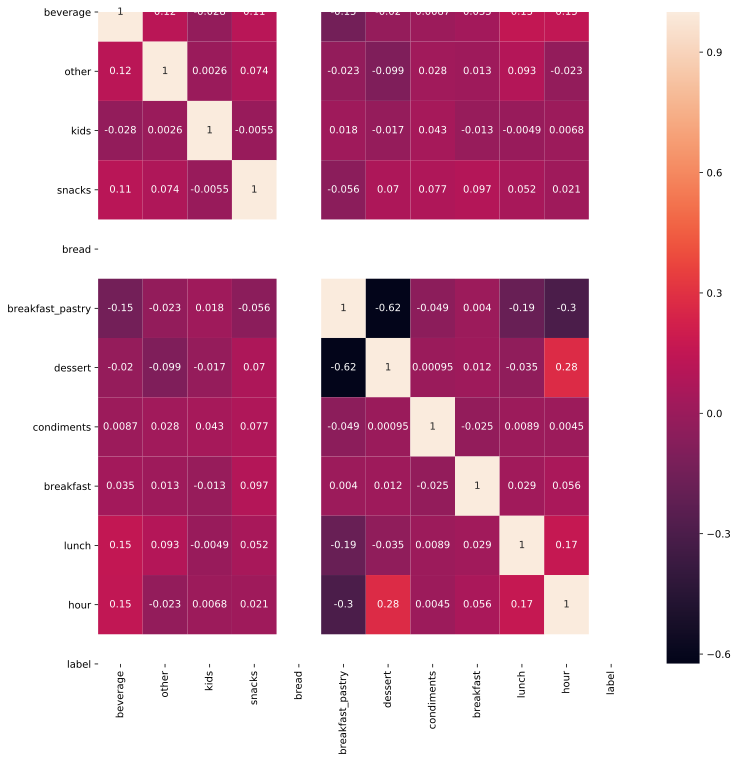

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(bread_group[bread_group.label==1].corr(), annot=True);